# 【問題1】自作データセットでの分類の学習
自作のデータセットに対して分類問題を解いてください。任意の実装を使用してください。

In [2]:
import os
import glob 
import re
import numpy  as np
import matplotlib.pyplot as plt

from PIL import Image

%matplotlib inline

In [78]:
path = '/Users/nobu/Desktop/train_set' 
flist = os.listdir(path)

!ls -a /Users/nobu/Desktop/train_set

flist_ignore = [name for name in os.listdir(path) if not name.startswith('.')]


img_list = glob.glob(path + '/*' + ".jpeg")

.          cat_1.jpeg cat_3.jpeg cat_5.jpeg dog_2.jpeg dog_4.jpeg
..         cat_2.jpeg cat_4.jpeg dog_1.jpeg dog_3.jpeg dog_5.jpeg


In [79]:
# np.resizeはだめ、ぜったい

dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img_ = Image.open(img)
        
        # サイズを揃える
        dog_img_ = dog_img_.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img_)
        
        # 正規化
        dog_img = dog_img / 255.
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img_ = Image.open(img)
        
        cat_img_ = cat_img_.resize((224, 224))
        
        cat_img = np.array(cat_img_)
        
        cat_img = cat_img / 255.
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)


In [80]:
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

dog_image:(5, 224, 224, 3)  cat_image:(5, 224, 224, 3)


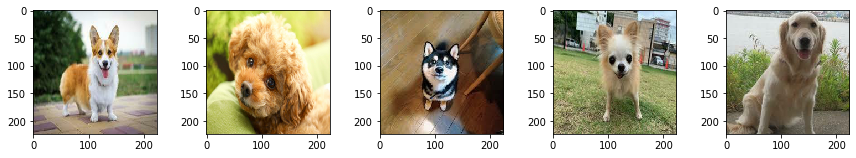

In [84]:
plt.figure(figsize=(15,5))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(dog_img_array[i])


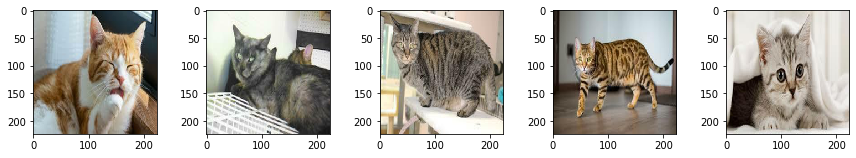

In [85]:
plt.figure(figsize=(15,5))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(cat_img_array[i])


In [68]:
#trainデータ

import numpy as np
X = np.concatenate([dog_img_array,cat_img_array])
print(X.shape)
y_dog = np.zeros(5)
y_cat = np.ones(5)

y = np.concatenate([y_dog,y_cat])


(10, 224, 224, 3)


In [69]:
#テストデータ

path = '/Users/nobu/Desktop/sprint18_dataset/test' 
flist = os.listdir(path)
!
# 不可視ファイルの.DS_Storeファイルを除いて読み込む
flist_ignore = [name for name in os.listdir(path) if not name.startswith('.')]
# 不可視ファイルの.DS_Storeファイルを除いて読み込む

flist_ignore = [name for name in os.listdir(path) if not name.startswith('.')]
#print(flist_ignore)

img_list = glob.glob(path + '/*' + ".jpg")

# np.resizeはだめ、ぜったい

dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img_ = Image.open(img)
        
        # サイズを揃える
        dog_img_ = dog_img_.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img_)
        
        # 正規化
        dog_img = dog_img / 255.
        
        dog_img = dog_img[:, :, :3]
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img_ = Image.open(img)
        
        cat_img_ = cat_img_.resize((224, 224))
        
        cat_img = np.array(cat_img_)
        
        cat_img = cat_img / 255.
        
        cat_img = cat_img[:, :, :3]
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)


X_test = np.concatenate([dog_img_array,cat_img_array])
y_test = np.concatenate([np.zeros(4),np.ones(4)])

In [74]:
import tensorflow as tf
from livelossplot import PlotLossesKeras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.optimizers import Adam

#kerasで4層のモデル作成
K.clear_session()#データグラフをリセット

model = Sequential()

model.add(Conv2D(24,3,input_shape=(224,224,3)))
model.add(Activation('relu'))

model.add(Conv2D(48,3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(96,3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))


model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(0.001),
    metrics=['accuracy']
)

history = model.fit(X,y,epochs=10,verbose=1)

score = model.evaluate(X_test,y_test)
print('Test loss:', score[0])
print('Test acc:', score[1])

Epoch 1/10
10/10 [==============================] - 1s 101ms/step - loss: 0.6988 - accuracy: 0.4000
Epoch 2/10
10/10 [==============================] - 1s 89ms/step - loss: 6.6687 - accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 1s 80ms/step - loss: 3.6800 - accuracy: 0.5000
Epoch 4/10
10/10 [==============================] - 1s 102ms/step - loss: 1.2325 - accuracy: 0.5000
Epoch 5/10
10/10 [==============================] - 1s 96ms/step - loss: 0.5807 - accuracy: 0.7000
Epoch 6/10
10/10 [==============================] - 1s 85ms/step - loss: 0.5486 - accuracy: 0.7000
Epoch 7/10
10/10 [==============================] - 1s 80ms/step - loss: 0.2716 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 1s 84ms/step - loss: 0.9996 - accuracy: 0.5000
Epoch 9/10
10/10 [==============================] - 1s 80ms/step - loss: 0.1726 - accuracy: 1.0000
Epoch 10/10
8/8 [==============================] - 0s 21ms/step
Test loss: 1.0490739345550537
Test acc: 0.3

➡︎水増ししないとTest acc: 0.375

# 【問題2】分類データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。


《データ拡張のためのライブラリ》


データ拡張にはalbumentationsなどがあります。


albu/albumentations: fast image augmentation library and easy to use wrapper around other libraries


また、Kerasを使う場合はImageDataGeneratorも便利です。




《データ拡張の効果の調査》


データ拡張には様々な方法があります。今回のタスクにおいて各手法がどう効果があるかを実験・考察してください。

In [86]:
#ImageDataGeneratorによるデータ拡張を犬・猫５枚ずつそれぞれに適用する


from keras.preprocessing.image import ImageDataGenerator
import os
import cv2
DATA_DIR = '/Users/nobu/Desktop/sprint18_dataset'  # データディレクトリ
IMAGE_NAME = '/Users/nobu/Desktop/sprint18_dataset/dog_5.jpeg'  # 対象画像ファイル
SAVE_DIR = os.path.join(DATA_DIR, '/Users/nobu/Desktop/genarated')  # 生成画像の保存先ディレクトリ
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
)
img_array = cv2.imread(os.path.join(DATA_DIR, IMAGE_NAME),)  # 画像読み込み
img_array = img_array.reshape((1,) + img_array.shape)  # 4次元データに変換（flow()に渡すため）
# 保存先ディレクトリが存在しない場合、作成する。
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)
# flow()により、ランダム変換したイメージのバッチを作成。
# 指定したディレクトリに生成画像を保存する。
i = 0
for batch in datagen.flow(img_array, batch_size=1,
                          save_to_dir=SAVE_DIR, save_prefix='dog', save_format='jpeg'):
    i += 1
    if i == 10:
        break  # 停止しないと無限ループ

In [87]:
path = '/Users/nobu/Desktop/sprint18_dataset' 
flist = os.listdir(path)

In [88]:
!ls -a /Users/nobu/Desktop/sprint18_dataset

.               cat_0_388.jpeg  cat_0_8068.jpeg dog_0_2138.jpeg dog_0_6376.jpeg
..              cat_0_4354.jpeg cat_0_834.jpeg  dog_0_2501.jpeg dog_0_6499.jpeg
.DS_Store       cat_0_4700.jpeg cat_0_8401.jpeg dog_0_2544.jpeg dog_0_6879.jpeg
cat_0_1307.jpeg cat_0_4883.jpeg cat_0_861.jpeg  dog_0_2680.jpeg dog_0_6943.jpeg
cat_0_1602.jpeg cat_0_505.jpeg  cat_0_8893.jpeg dog_0_2698.jpeg dog_0_7227.jpeg
cat_0_1619.jpeg cat_0_5188.jpeg cat_0_9263.jpeg dog_0_2749.jpeg dog_0_7563.jpeg
cat_0_1630.jpeg cat_0_5216.jpeg cat_0_9781.jpeg dog_0_3276.jpeg dog_0_7836.jpeg
cat_0_171.jpeg  cat_0_5333.jpeg cat_1.jpeg      dog_0_3686.jpeg dog_0_7873.jpeg
cat_0_1751.jpeg cat_0_5461.jpeg cat_2.jpeg      dog_0_3837.jpeg dog_0_8567.jpeg
cat_0_2488.jpeg cat_0_6229.jpeg cat_3.jpeg      dog_0_3858.jpeg dog_0_8604.jpeg
cat_0_2746.jpeg cat_0_688.jpeg  cat_4.jpeg      dog_0_4179.jpeg dog_0_9061.jpeg
cat_0_2780.jpeg cat_0_6895.jpeg cat_5.jpeg      dog_0_4247.jpeg dog_0_9099.jpeg
cat_0_2845.jpeg cat_0_6975.jpeg dog_0_10

In [89]:
# 不可視ファイルの.DS_Storeファイルを除いて読み込む

'''
余談

.DS_Storeファイルとは？ 開けるの？

https://miloserdov.org/?p=3867

'''
flist_ignore = [name for name in os.listdir(path) if not name.startswith('.')]


In [90]:
img_list = glob.glob(path + '/*' + ".jpeg")

In [91]:
# np.resizeはだめ、ぜったい

dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img_ = Image.open(img)
        
        # サイズを揃える
        dog_img_ = dog_img_.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img_)
        
        # 正規化
        dog_img = dog_img / 255.
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img_ = Image.open(img)
        
        cat_img_ = cat_img_.resize((224, 224))
        
        cat_img = np.array(cat_img_)
        
        cat_img = cat_img / 255.
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)


In [92]:
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

dog_image:(55, 224, 224, 3)  cat_image:(55, 224, 224, 3)


### 拡張した画像例

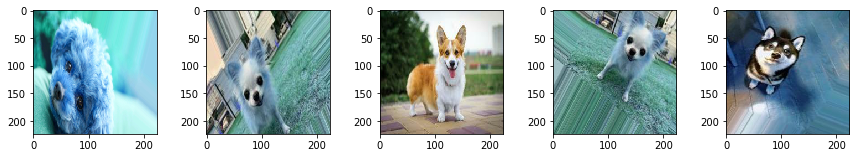

In [109]:
import random 
plt.figure(figsize=(15,5))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(dog_img_array[i+random.randint(0,50)])


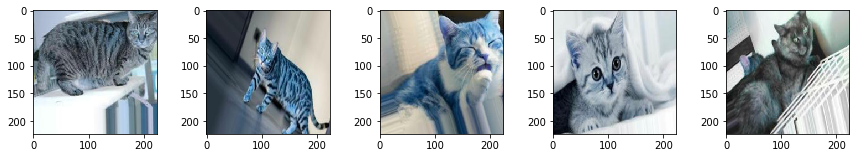

In [119]:
plt.figure(figsize=(15,5))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(cat_img_array[i+random.randint(0,50)])


In [120]:
#trainデータ

import numpy as np
X = np.concatenate([dog_img_array,cat_img_array])

y_dog = np.zeros(55)
y_cat = np.ones(55)

y = np.concatenate([y_dog,y_cat])



# データ拡張を行ったデータでtestデータに対して検証

In [121]:
import tensorflow as tf
from livelossplot import PlotLossesKeras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.optimizers import Adam

#kerasで4層のモデル作成
K.clear_session()#データグラフをリセット

model = Sequential()

model.add(Conv2D(24,3,input_shape=(224,224,3)))
model.add(Activation('relu'))

model.add(Conv2D(48,3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(96,3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))


In [124]:
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(0.01),
    metrics=['accuracy']
)

history = model.fit(X,y,epochs=10,verbose=1)

score = model.evaluate(X_test,y_test)
print('Test loss:', score[0])
print('Test acc:', score[1])

Epoch 1/10
110/110 [==============================] - 7s 67ms/step - loss: 23.1648 - accuracy: 0.6455
Epoch 2/10
110/110 [==============================] - 8s 70ms/step - loss: 0.7703 - accuracy: 0.6182
Epoch 3/10
110/110 [==============================] - 8s 74ms/step - loss: 0.6689 - accuracy: 0.5455
Epoch 4/10
110/110 [==============================] - 8s 75ms/step - loss: 0.6843 - accuracy: 0.5727
Epoch 5/10
110/110 [==============================] - 8s 72ms/step - loss: 0.6333 - accuracy: 0.7455
Epoch 6/10
110/110 [==============================] - 8s 72ms/step - loss: 0.4892 - accuracy: 0.7364
Epoch 7/10
110/110 [==============================] - 8s 71ms/step - loss: 0.4037 - accuracy: 0.8727
Epoch 8/10
110/110 [==============================] - 8s 71ms/step - loss: 0.1844 - accuracy: 0.9091
Epoch 9/10
110/110 [==============================] - 8s 73ms/step - loss: 0.1989 - accuracy: 0.9273
Epoch 10/10
8/8 [==============================] - 0s 29ms/step
Test loss: 1.4370312690734

データ拡張無しのTest acc: 0.375
データ拡張無しのTest acc: 0.5

➡︎元の画像に拡大、回転、BGR変換の３種類で水増しを行ったデータを使うことでaccが上がった。

また、どれか１種法よりも3つ組み合わせた方が精度が上がった。

# 【問題3】物体検出データセットの用意
次に、物体検出を行います。バウンディングボックスのアノテーションを行い物体検出のためのデータセットを作成してください。


《アノテーションのためのツール》


アノテーションツールにはLabelImgなどがあります。


tzutalin/labelImg: LabelImg is a graphical image annotation tool and label object bounding boxes in images


https://symfoware.blog.fc2.com/blog-entry-2420.html

In [172]:
BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)


def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img


def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(7, 7))
    plt.imshow(img)

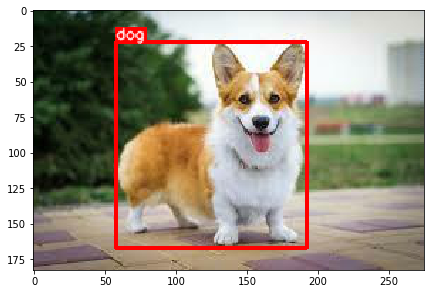

In [207]:
dog_img = Image.open('/Users/nobu/Desktop/train_set/dog_1.jpeg')
dog_img = np.array(dog_img)
dog_annotations = {'image': dog_img, 'bboxes': [[58, 22, 134, 145]], 'category_id': [1]}
category_id_to_name = {0: 'cat',1: 'dog'}

visualize(dog_annotations, category_id_to_name)

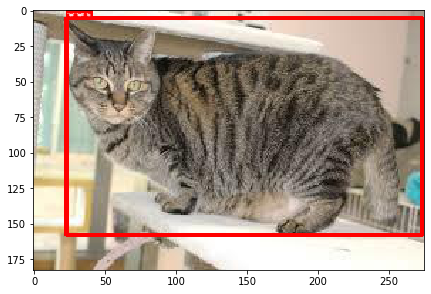

In [208]:
cat_img = Image.open('/Users/nobu/Desktop/train_set/cat_3.jpeg')
cat_img = np.array(cat_img)

cat_annotations = {'image': cat_img, 'bboxes': [[23, 5, 250, 153]], 'category_id': [0]}
category_id_to_name = {0: 'cat',1: 'dog'}

visualize(cat_annotations, category_id_to_name)

# 【問題4】物体検出データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。前述のalbumentationsはバウンディングボックスを合わせての加工が可能です。詳細はREADME.mdを確認してください。


物体検出の学習を行なうかどうかは任意とします。

In [170]:
import albumentations as A
from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, RandomBrightnessContrast, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, Flip, OneOf, Compose
)


def get_aug(aug, min_area=0., min_visibility=0.):
    return Compose(aug, bbox_params=A.BboxParams(format='coco', min_area=min_area, 
                                               min_visibility=min_visibility, label_fields=['category_id']))

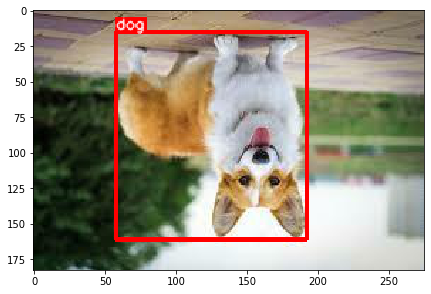

In [209]:
aug = get_aug([A.VerticalFlip(p=1)])
augmented = aug(**dog_annotations)
visualize(augmented, category_id_to_name)

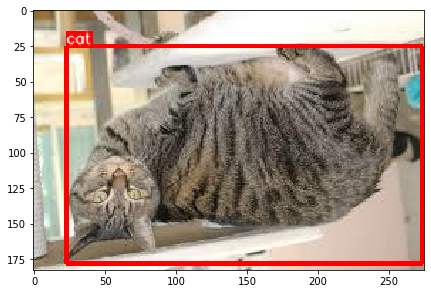

In [210]:
augmented = aug(**cat_annotations)
visualize(augmented, category_id_to_name)